<h1 style="font-size:35px;
        color:black;
        ">Lab 1 Quantum Measurements</h1>

Prerequisite
- [Ch.1.4 Single Qubit Gates](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)
- [Ch.2.2 Multiple Qubits and Entangled States](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html)
- [Mitigating Noise on Real Quantum Computers](https://www.youtube.com/watch?v=yuDxHJOKsVA&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=8)


Other relevant materials
- [Feynman Lectures Ch. III - 12](https://www.feynmanlectures.caltech.edu/III_12.html)
- [Quantum Operation](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)
- [Interactive Bloch Sphere](https://nonhermitian.org/kaleido/stubs/kaleidoscope.interactive.bloch_sphere.html#kaleidoscope.interactive.bloch_sphere)
- [Ch.5.2 Measurement Error Mitigation](https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html)

In [1]:
from qiskit import *
import numpy as np
from numpy import linalg as la
from qiskit.tools.monitor import job_monitor
import qiskit.tools.jupyter
import matplotlib.pyplot as plt #needed to draw circuits

<h2 style="font-size:24px;">Part 1: Measuring the state of a qubit</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Determine the Bloch components of a qubit.</p>
</div>

Fundamental to the operation of a quantum computer is the ability to compute the Bloch components of a qubit or qubits. These components correspond to the expectation values of the Pauli operators $X, Y, Z$, and are important quantities for applications such as quantum chemistry and optimization.  Unfortunately, it is impossible to simultaneously compute these values, thus requiring many executions of the same circuit.  In addition, measurements are restricted to the computational basis (Z-basis) so that each Pauli needs to be rotated to the standard basis to access the x and y components.  Here we verify the methods by considering the case of a random vector on the Bloch sphere.

<h3 style="font-size: 20px">&#128211; 1. Express the expectation values of the Pauli operators for an arbitrary qubit state $|q\rangle$ in the computational basis. </h3>

The case for the expectation value of Pauli Z gate is given as an example. 

Using the diagonal representation, also known as spectral form or orthonormal decomposition, of Pauli $Z$ gate and the relations among the Pauli gates (see [here](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)), expectation values of $ X, Y, Z $ gates can be written using $ X=HZH$ and $Y = SXS^\dagger$ as  

$$
\begin{align}
\langle Z \rangle &=\langle q | Z | q\rangle =\langle q|0\rangle\langle 0|q\rangle - \langle q|1\rangle\langle 1|q\rangle
=|\langle 0 |q\rangle|^2 - |\langle 1 | q\rangle|^2
\\\\
\langle X \rangle &=\langle q | HZH | q\rangle =\langle q|H|Z|H|q\rangle = \langle q'|Z|q'\rangle =\langle q'|0\rangle\langle 0|q'\rangle - \langle q'|1\rangle\langle 1|q'\rangle =|\langle 0 |q'\rangle|^2 - |\langle 1 | q'\rangle|^2 
\\\\
\langle Y \rangle &=\langle q | SXS^\dagger | q\rangle =\langle q|S|X|S^\dagger|q\rangle = \langle q''|X|q''\rangle =\langle q''|H|Z|H|q''\rangle = \langle q'''|Z|q'''\rangle =\langle q'''|0\rangle\langle 0|q'''\rangle - \langle q'''|1\rangle\langle 1|q'''\rangle =|\langle 0 |q'''\rangle|^2 - |\langle 1 | q'''\rangle|^2, \\\\
\end{align}
\\
$$
where $H|q\rangle \equiv |q'\rangle$, $S^\dagger|q\rangle \equiv |q''\rangle$, and $H|q''\rangle \equiv |q'''\rangle$.

Therefore, the expectation values of the Paulis for a qubit state $|q\rangle$ can be obtained by making a measurement in the standard basis after rotating the standard basis frame to lie along the corresponding axis. The probabilities of obtaining the two possible outcomes 0 and 1 are used to evaluate the desired expectation value as the above equations show.

<h3 style="font-size: 20px">2. Measure the Bloch sphere coordinates of a qubit using the Aer simulator and plot the vector on the Bloch sphere.</h3>

<h4 style="font-size: 17px">&#128211;Step A. Create a qubit state using the circuit method, <code>initialize</code> with two random complex numbers as the parameter.</h4>

To learn how to use the function `initialize`, check [here](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Arbitrary-initialization). (go to the `arbitrary initialization` section.)

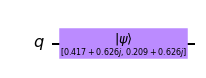

In [3]:
#### your code goes here
import random
import numpy as np

a = complex(random.randint(1,6),random.randint(1,6))
b = complex(random.randint(1,6),random.randint(1,6))

norm = np.sqrt(a * a.conjugate() + b * b.conjugate())

desired_vector = [a/norm,b/norm]

qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
qc.initialize(desired_vector, 0) # Apply randomization operation to the 0th qubit
qc.draw('mpl')  # Let's view our circuit

<h4 style="font-size: 17px">&#128211; Step B. Build the circuits to measure the expectation values of $X, Y, Z$ gate based on your answers to the question 1.  Run the cell below to estimate the Bloch sphere coordinates of the qubit from step A using the Aer simulator.</h4>

The circuit for $Z$ gate measurement is given as an example.

In [89]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

import random
import numpy as np

a = complex(random.randint(1,6),random.randint(1,6))
b = complex(random.randint(1,6),random.randint(1,6))

norm = np.sqrt(a * a.conjugate() + b * b.conjugate())

# From Example in https://qiskit.org/textbook/ch-states/single-qubit-gates.html -------------------------

# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

# Create the Y-measurement function:
def y_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the Y-basis, and store the result in 'cbit'"""
    qc.sdg(qubit)
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

# Create the Z-measurement function:
def z_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the Z-basis, and store the result in 'cbit'"""
    qc.measure(qubit, cbit)
    return qc

#-------------------------

initial_state = [a/norm, b/norm]

# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)

shots = 2**14 # number of samples used for statistics
sim = Aer.get_backend('aer_simulator')
bloch_vector_measure = []
for measure_circuit in [x_measurement(qc, 0, 0), y_measurement(qc, 0, 0), z_measurement(qc, 0, 0)]:
    
    # run the circuit with the selected measurement and get the number of samples that output each bit value
    circ_trans = transpile(qc.compose(measure_circuit), sim)
    counts = sim.run(qc.compose(circ_trans), shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector_measure.append( probs['0'] -  probs['1'] )

# normalizing the Bloch sphere vector
bloch_vector = bloch_vector_measure/la.norm(bloch_vector_measure)

print('The Bloch sphere coordinates are [{0:4.3f}, {1:4.3f}, {2:4.3f}]'
      .format(*bloch_vector))

The Bloch sphere coordinates are [0.175, -0.088, 0.981]


<h4 style="font-size: 17px">Step C. Plot the vector on the Bloch sphere.</h4>

Note that the following cell for the interactive bloch_sphere would not run properly unless you work in [IQX](https://quantum-computing.ibm.com/login). You can either use `plot_bloch_vector` for the non-interactive version or install `kaleidoscope` by running 

```
pip install kaleidoscope

```
in a terminal.  You also need to restart your kernel after the installation.  To learn more about how to use the interactive Bloch sphere, go [here](https://nonhermitian.org/kaleido/stubs/kaleidoscope.interactive.bloch_sphere.html#kaleidoscope.interactive.bloch_sphere).

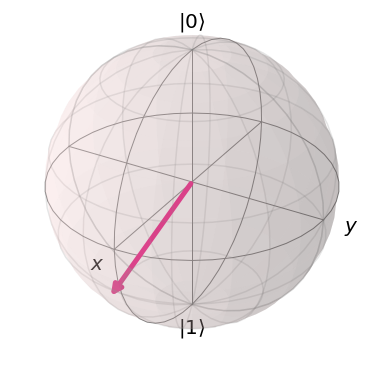

In [23]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector( bloch_vector )

<h2 style="font-size:24px;">Part 2: Measuring Energy</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Evaluate the energy levels of the hydrogen ground state using Aer simulator.</p>
</div>


The energy of a quantum system can be estimated by measuring the expectation value of its Hamiltonian, which is a Hermitian operator, through the procedure we mastered in part 1.

The ground state of hydrogen is not defined as a single unique state but actually contains four different states due to the spins of the electron and proton. In part 2 of this lab, we evaluate the energy difference among these four states, which is from the `hyperfine splitting`, by computing the energy expectation value for the system of two spins with the Hamiltonian expressed in Pauli operators. For more information about `hyperfine structure`, see [here](https://www.feynmanlectures.caltech.edu/III_12.html)

Consider the system with two qubit interaction Hamiltonian $H = A(XX+YY+ZZ)$ where $A = 1.47e^{-6} eV$ and $X, Y, Z$ are Pauli gates. Then the energy expectation value of the system can be evaluated by combining the expectation value of each term in the Hamiltonian.
In this case, $E = \langle H\rangle = A( \langle XX\rangle + \langle YY\rangle + \langle ZZ\rangle )$. 

<h3 style="font-size: 20px">&#128211; 1. Express the expectation value of each term in the Hamiltonian for an arbitrary two qubit state   $|\psi \rangle$ in the computational basis.</h3>

The case for the term $\langle ZZ\rangle$ is given as an example.

$$
\begin{align}
\langle ZZ\rangle &=\langle \psi | ZZ | \psi\rangle =\langle \psi|(|0\rangle\langle 0| - |1\rangle\langle 1|)\otimes(|0\rangle\langle 0| - |1\rangle\langle 1|) |\psi\rangle
=|\langle 00|\psi\rangle|^2 - |\langle 01 | \psi\rangle|^2 - |\langle 10 | \psi\rangle|^2 + |\langle 11|\psi\rangle|^2
\\\\
\langle XX\rangle &= \langle \psi | HZH \otimes HZH | \psi \rangle =\langle \psi ' |ZH \otimes HZ| \psi ' \rangle \\
&= \frac{1}{2} \langle \psi '| \bigg(|00\rangle \langle 00|+|01\rangle \langle 00|-|10\rangle \langle 00|-|11\rangle \langle 00|-|00\rangle \langle 01|+|01\rangle \langle 01|+|10\rangle \langle 01|-|11\rangle \langle 01|+|00\rangle \langle 10|+|01\rangle \langle 10|\cdots\\
&\cdots+|10\rangle \langle 10|+|11\rangle \langle 10|-|00\rangle \langle 11|+|01\rangle \langle 11|-|10\rangle \langle 11|+|11\rangle \langle 11|\bigg) |\psi ' \rangle
\\\\
\langle YY\rangle &= \langle \psi | SXS^\dagger \otimes SXS^\dagger | \psi \rangle =\langle \psi '' |X \otimes X| \psi '' \rangle \\
&= \frac{1}{2} \langle \psi ''| \bigg(|00\rangle \langle 00|+|01\rangle \langle 00|-|10\rangle \langle 00|-|11\rangle \langle 00|-|00\rangle \langle 01|+|01\rangle \langle 01|+|10\rangle \langle 01|-|11\rangle \langle 01|+|00\rangle \langle 10|+|01\rangle \langle 10|\cdots\\
&\cdots+|10\rangle \langle 10|+|11\rangle \langle 10|-|00\rangle \langle 11|+|01\rangle \langle 11|-|10\rangle \langle 11|+|11\rangle \langle 11|\bigg) |\psi '' \rangle
\end{align}
\\
$$

where $H|\psi\rangle \equiv |\psi'\rangle$ and $S^\dagger|\psi\rangle \equiv |\psi''\rangle$.

<h3 style="font-size: 20px">2. Measure the expected energy of the system using the Aer simulator when two qubits are entangled. Regard the bell basis, four different entangled states.</h3>

<h4 style="font-size: 17px">&#128211;Step A. Construct the circuits to prepare four different bell states.</h4>

Let's label each bell state as
$$
\begin{align}
Tri1 &= \frac{1}{\sqrt2} (|00\rangle + |11\rangle)\\
Tri2 &= \frac{1}{\sqrt2} (|00\rangle - |11\rangle)\\
Tri3 &= \frac{1}{\sqrt2} (|01\rangle + |10\rangle)\\
Sing &= \frac{1}{\sqrt2} (|10\rangle - |01\rangle)
\end{align}
$$

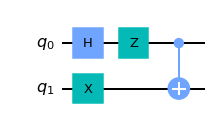

In [81]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply Z-gate to the first:
qc.z(0)
# Apply X-gate to the second:
qc.x(1)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')



In [80]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply Z-gate to the first:
qc.z(0)
# Apply X-gate to the second:
qc.x(1)
# Apply a CNOT:
qc.cx(0,1)

# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [86]:
# circuit for the state Tri1
Tri1 = QuantumCircuit(2, 2)
# your code goes here

# Apply H-gate to the first:
Tri1.h(0)
# Apply a CNOT:
Tri1.cx(0,1)

#--------------------------------
# circuit for the state Tri2
Tri2 = QuantumCircuit(2, 2)
# your code goes here

# Apply H-gate to the first:
Tri2.h(0)
# Apply Z-gate to the first:
Tri2.z(0)
# Apply a CNOT:
Tri2.cx(0,1)

#--------------------------------
# circuit for the state Tri3
Tri3 = QuantumCircuit(2, 2)
# your code goes here

# Apply H-gate to the first:
Tri3.h(0)
# Apply X-gate to the second:
Tri3.x(1)
# Apply a CNOT:
Tri3.cx(0,1)

#--------------------------------
# circuit for the state Sing
Sing = QuantumCircuit(2, 2)
# your code goes here

# Apply H-gate to the first:
Sing.h(0)
# Apply Z-gate to the first:
Sing.z(0)
# Apply X-gate to the second:
Sing.x(1)
# Apply a CNOT:
Sing.cx(0,1)


<h4 style="font-size: 17px">&#128211;Step B. Create the circuits to measure the expectation value of each term in the Hamiltonian based on your answer to the question 1.</h4>

In [91]:
# <ZZ> 
measure_ZZ = QuantumCircuit(2)
measure_ZZ.measure_all()

# <XX>
measure_XX = QuantumCircuit(2)
# your code goes here
measure_XX.h(0)
measure_XX.h(1)
measure_XX.measure_all()



# <YY>
measure_YY = QuantumCircuit(2)
# your code goes here
measure_YY.sdg(0)
measure_YY.h(0)
measure_YY.sdg(1)
measure_YY.h(1)
measure_YY.measure_all()





<h4 style="font-size: 17px">&#128211;Step C. Execute the circuits on Aer simulator by running the cell below and evaluate the energy expectation value for each state.</h4>

In [92]:
shots = 2**14 # number of samples used for statistics

A = 1.47e-6 #unit of A is eV
E_sim = []
for state_init in [Tri1,Tri2,Tri3,Sing]:
    Energy_meas = []
    for measure_circuit in [measure_XX, measure_YY, measure_ZZ]:
    
        # run the circuit with the selected measurement and get the number of samples that output each bit value
        qc = state_init.compose(measure_circuit)
        qc_trans = transpile(qc, sim)
        counts = sim.run(qc_trans, shots=shots).result().get_counts()

        # calculate the probabilities for each computational basis
        probs = {}
        for output in ['00','01', '10', '11']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0
            
        Energy_meas.append( probs['00'] - probs['01'] - probs['10'] + probs['11'] )
 
    E_sim.append(A * np.sum(np.array(Energy_meas)))

In [93]:
# Run this cell to print out your results

print('Energy expectation value of the state Tri1 : {:.3e} eV'.format(E_sim[0]))
print('Energy expectation value of the state Tri2 : {:.3e} eV'.format(E_sim[1]))
print('Energy expectation value of the state Tri3 : {:.3e} eV'.format(E_sim[2]))
print('Energy expectation value of the state Sing : {:.3e} eV'.format(E_sim[3]))

Energy expectation value of the state Tri1 : 1.470e-06 eV
Energy expectation value of the state Tri2 : 1.470e-06 eV
Energy expectation value of the state Tri3 : 1.470e-06 eV
Energy expectation value of the state Sing : -4.410e-06 eV


 <h4 style="font-size: 17px">Step D. Understanding the result. </h4>

If you found the energy expectation values successfully, you would have obtained exactly the same value, $A (= 1.47e^{-6} eV)$, for the triplet states, $|Tri1\rangle, |Tri2\rangle, |Tri3\rangle$ and one lower energy level, $-3A (= -4.41e^{-6} eV)$ for the singlet state $|Sing\rangle$.   

What we have done here is measuring the energies of the four different spin states corresponding to the ground state of hydrogen and observed `hyperfine structure` in the energy levels caused by spin-spin coupling.  This tiny energy difference between the singlet and triplet states is the reason for the famous 21-cm wavelength radiation used to map the structure of the galaxy.  

In the cell below, we verify the wavelength of the emission from the transition between the triplet states and singlet state. 

In [94]:
# reduced plank constant in (eV) and the speed of light(cgs units)
hbar, c = 4.1357e-15, 3e10

# energy difference between the triplets and singlet
E_del = abs(E_sim[0] - E_sim[3])

# frequency associated with the energy difference
f = E_del/hbar

# convert frequency to wavelength in (cm) 
wavelength = c/f

print('The wavelength of the radiation from the transition\
 in the hyperfine structure is : {:.1f} cm'.format(wavelength))

The wavelength of the radiation from the transition in the hyperfine structure is : 21.1 cm


<h2 style="font-size:24px;">Part 3: Execute the circuits on Quantum Computer</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;"> Re-run the circuits on a IBM quantum system.  Perform measurement error mitigations on the result to improve the accuracy in the energy estimation.</p>
</div>

<h4 style="font-size: 17px">Step A. Run the following cells to load your account and select the backend </h4>

In [101]:
provider = IBMQ.load_account()
IBMQ.active_account() #make sure you've loaded/saved your account with using you API token
provider.backends()

ibmqfactory.load_account:WARNING:2022-02-24 13:48:49,812: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [105]:
backend = provider.get_backend('ibmq_qasm_simulator')
#Store your API token locally

#backend = provider.get_backend('ibm_casablanca') 

<h4 style="font-size: 17px">Step B. Execute the circuits on the quantum system. </h4>


In Lab1 when we executed multiple circuits on a real quantum system, we submitted each circuit as a separate job which produces the multiple job ids. This time, we put all the circuits in a list and execute the list of the circuits as one job. In this way, all the circuit executions can happen at once, which would possibly decrease your wait time in the queue.

<p>&#128211; <b>Check the backend configuration information and error map through the widget to determine your <code>initial_layout</code>.  The qubits on the hardware you want to use</b>

In [106]:
# run this cell to get the backend information through the widget
backend

<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>

In [112]:
# assign your choice for the initial layout to the list variable `initial_layout`.
initial_layout = [0,1]

Run the following cell to execute the circuits with the initial_layout on the backend.

In [113]:
qc_all = [state_init.compose(measure_circuit) for state_init in [Tri1,Tri2,Tri3,Sing] 
          for measure_circuit in [measure_XX, measure_YY, measure_ZZ] ]  

shots = 8192
qc_all_trans = transpile(qc_all, backend, initial_layout=initial_layout, optimization_level=3)
job = backend.run(qc_all_trans, shots=shots)
print(job.job_id())

6217d7c98c4ac8a3b2687800


In [114]:
# getting the results of your job
results = job.result()

In [116]:
## To access the results of the completed job.  Use the job id from two cells above
results = backend.retrieve_job('6217d7c98c4ac8a3b2687800').result()



<h4 style="font-size: 17px">Step C. Estimate the ground state energy levels from the results of the previous step by executing the cells below. </h4>

In [117]:
def Energy(results, shots):
    """Compute the energy levels of the hydrogen ground state.
    
    Parameters:
        results (obj): results, results from executing the circuits for measuring a Hamiltonian.
        shots (int): shots, number of shots used for the circuit execution.
        
    Returns:
        Energy (list): energy values of the four different hydrogen ground states
    """
    E = []
    A = 1.47e-6

    for ind_state in range(4):
        Energy_meas = []
        for ind_comp in range(3):
            counts = results.get_counts(ind_state*3+ind_comp)
        
            # calculate the probabilities for each computational basis
            probs = {}
            for output in ['00','01', '10', '11']:
                if output in counts:
                    probs[output] = counts[output]/shots
                else:
                    probs[output] = 0
            
            Energy_meas.append( probs['00'] - probs['01'] - probs['10'] + probs['11'] )

        E.append(A * np.sum(np.array(Energy_meas)))
    
    return E

In [118]:
E = Energy(results, shots)

print('Energy expectation value of the state Tri1 : {:.3e} eV'.format(E[0]))
print('Energy expectation value of the state Tri2 : {:.3e} eV'.format(E[1]))
print('Energy expectation value of the state Tri3 : {:.3e} eV'.format(E[2]))
print('Energy expectation value of the state Sing : {:.3e} eV'.format(E[3]))

Energy expectation value of the state Tri1 : 1.470e-06 eV
Energy expectation value of the state Tri2 : 1.470e-06 eV
Energy expectation value of the state Tri3 : 1.470e-06 eV
Energy expectation value of the state Sing : -4.410e-06 eV


<h4 style="font-size: 17px">Step D. Measurement error mitigation. </h4>

The results you obtained from running the circuits on the quantum system are not exact due to the noise from the various sources such as enery relaxation, dephasing, crosstalk between qubits, etc. In this step, we will alleviate the effects of the noise through the measurement error mitigation. Before we start, watch this [video](https://www.youtube.com/watch?v=yuDxHJOKsVA&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=8). 

In [ ]:
from qiskit.ignis.mitigation.measurement import *

<p>&#128211;Construct the circuits to profile the measurement errors of all basis states using the function 'complete_meas_cal'.  Obtain the measurement filter object, 'meas_filter', which will be applied to the noisy results to mitigate readout (measurement) error.<p> 

For further helpful information to complete this task, check [here](https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html) . 

In [ ]:
# your code to create the circuits, meas_calibs, goes here

# so i think you create a circuit that is just two quantum bits and then you see how the actual machine handles it.
qr = QuantumRegister(2)
meas_calibs, state_labels =  complete_meas_cal(qr=qr, circlabel='mcal')

for circuit in meas_calibs:
    print('Circuit',circuit.name)
    print(circuit)
    print()


# execute meas_calibs on your choice of the backend
meas_calibs_trans = transpile(meas_calibs, backend, optimization_level=3)
#job = backend.run(meas_calibs_trans, backend, shots = shots) #not working bc of backend
job = backend.run(meas_calibs_trans, shots=shots)
print(job.job_id())
job_monitor(job)
cal_results = job.result()

## To access the results of the completed job
#cal_results = backend.retrieve_job('job_id').result()


# your code to obtain the measurement filter object, 'meas_filter', goes here

meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

#np.array_to_latex(meas_fitter.cal_matrix) #need to pip install array-to-latex? this doesnt work idk why

#based on how the real quantum computer handles these results which are known. we can expect an error on the circuit
# we are interested in and correct using the filter and fitter.


In [ ]:
meas_filter = meas_fitter.filter
#array_to_latex(meas_fitter.cal_matrix) #need to pip install array-to-latex

results_new = meas_filter.apply(results)

In [ ]:
E_new = Energy(results_new, shots)

print('Energy expection value of the state Tri1 : {:.3e} eV'.format(E_new[0]))
print('Energy expection value of the state Tri2 : {:.3e} eV'.format(E_new[1]))
print('Energy expection value of the state Tri3 : {:.3e} eV'.format(E_new[2]))
print('Energy expection value of the state Sing : {:.3e} eV'.format(E_new[3]))

<h4 style="font-size: 17px">Step E. Interpret the result. </h4>

<p>&#128211; <b> Compute the relative errors ( or the fractional error ) of the energy values for all four states with and without measurement error mitigation.</b><p>

In [ ]:
# results for the energy estimation from the simulation, 
# execution on a quantum system without error mitigation and
# with error mitigation in numpy array format 
Energy_exact, Energy_exp_orig, Energy_exp_new = np.array(E_sim), np.array(E), np.array(E_new)

In [ ]:
# Calculate the relative errors of the energy values without error mitigation 
# and assign to the numpy array variable `Err_rel_orig` of size 4
Err_rel_orig = (Energy_exact - Energy_exp_orig)/Energy_exact

In [ ]:
# Calculate the relative errors of the energy values with error mitigation 
# and assign to the numpy array variable `Err_rel_new` of size 4
Err_rel_new = (Energy_exact - Energy_exp_new)/Energy_exact

In [ ]:
np.set_printoptions(precision=3)

print('The relative errors of the energy values for four bell basis\
 without measurement error mitigation : {}'.format(Err_rel_orig))

In [ ]:
np.set_printoptions(precision=3)

print('The relative errors of the energy values for four bell basis\
 with measurement error mitigation : {}'.format(Err_rel_new))

<p>&#128211; <b> Compare the size of the errors before and after the measurment error mitigation and discuss about the effect of the readout error regarding the error map information of the backend that you selected.</b><p>  

**Your answer:**

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright